In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/insurance.csv")

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df_copy=df.copy()

In [15]:
df_copy.duplicated().sum()

np.int64(1)

In [16]:
df_copy.drop_duplicates(inplace=True)

In [17]:
df_copy.duplicated().sum()

np.int64(0)

In [26]:
df_copy['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [27]:
#finding the region which has most no of smoker
df_copy[df_copy['smoker']=='yes']['region'].value_counts()

,count
region,
southeast,91
northeast,67
southwest,58
northwest,58


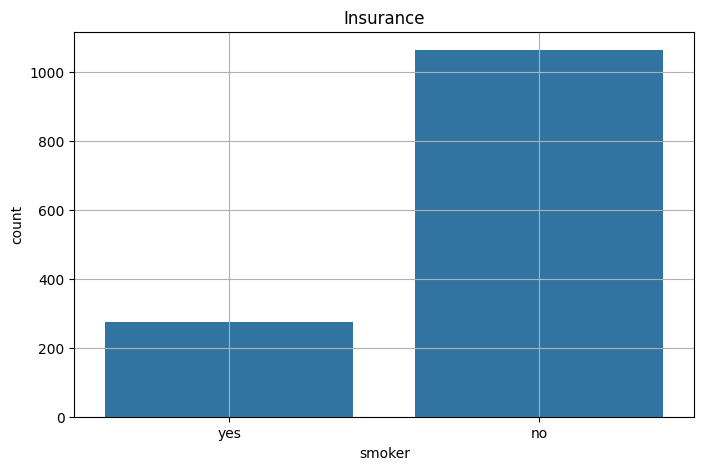

In [29]:
#Visualize categorical count
plt.figure(figsize=(8,5))
sns.countplot(x='smoker',data=df_copy)
plt.title("Insurance")

plt.grid(True)
plt.show()

In [30]:
df_copy['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


<Axes: >

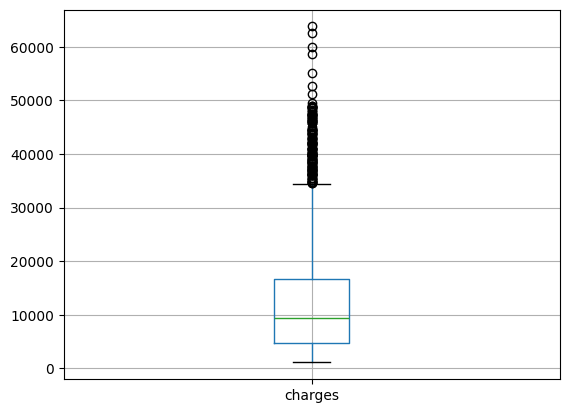

In [31]:
df_copy.boxplot(column='charges')

In [51]:
#Outlier handling
q1=df_copy['charges'].quantile(0.25)
q3=df_copy['charges'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
df_copy[(df_copy['charges']>upper_limit) | (df_copy['charges']<lower_limit)]

,age,sex,bmi,children,smoker,region,charges,age_group


In [52]:
#feature engineering to age group
df_copy['age_group'] = pd.cut(df_copy['age'], bins=[0, 18, 35, 60, 100],
labels=['Teen', 'Young Adult', 'Adult', 'Senior'])